# 0. Setup Paths

In [28]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'tomato_detectio_640x640_v8' 
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
}

file_paths = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

# 1. Download pretrained Tensorflow Model and install TFOD

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [29]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    command = "git clone https://github.com/tensorflow/models {}".format(paths['APIMODEL_PATH'])
    print(command)
    !{command}

In [ ]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Verify that everything is setup correctly.  
The script should execute with 'OK (skipped=1)'

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [ ]:
import object_detection

# 2. Verify that Downloaded Model from Colab got extracted and copied to the correct directory

In [30]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

Extract and copy the downloaded Model to 'Tensorflow/workspace/models'

In [ ]:
if os.path.exists(paths['CHECKPOINT_PATH']):
    print("Model available at: {}".format(paths['CHECKPOINT_PATH']))
else: 
    print("Model not available at: {}".format(paths['CHECKPOINT_PATH']))

# 2. Evaluate Model

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],file_paths['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
print(command)

In [ ]:
!{command}

# 3. Evaluate Model in Tensorboard

In [ ]:
!cd Tensorflow/workspace/models/{CUSTOM_MODEL_NAME}/train
print('Open http://www.localhost:6006/ in your browser')
!tensorboard --logdir=.

# 4. Load Trained Model From Checkpoint

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(file_paths['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-21')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 5. Detect from an Image

In [ ]:
import cv2 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(file_paths['LABELMAP'])

Run Image detection on an image

Tensorflow/workspace/images/testset\DSC_0012.JPG
100
Ripe Tomatos: 1
Unripe Tomatos: 1


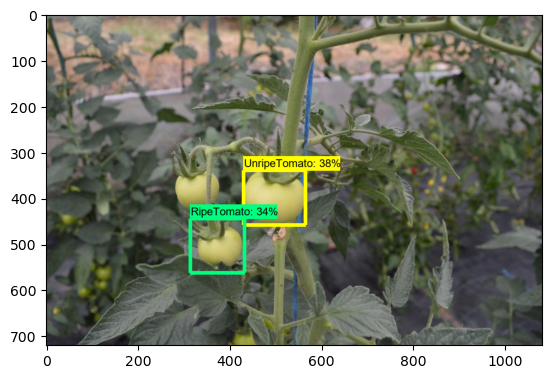

Tensorflow/workspace/images/testset\DSC_0035.JPG
100
Ripe Tomatos: 2
Unripe Tomatos: 2


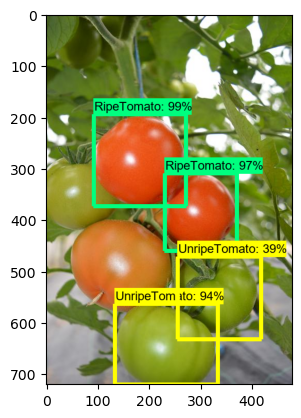

Tensorflow/workspace/images/testset\DSC_0279.JPG
100
Ripe Tomatos: 1
Unripe Tomatos: 3


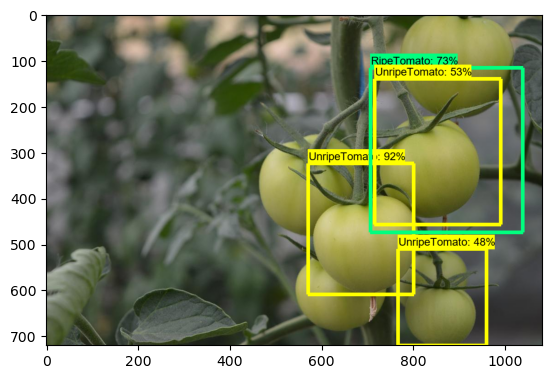

Tensorflow/workspace/images/testset\DSC_0474.JPG
100
Ripe Tomatos: 1
Unripe Tomatos: 2


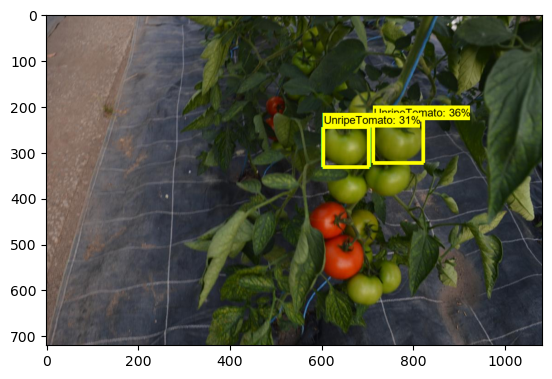

Tensorflow/workspace/images/testset\IMG_7523.JPG
100
Ripe Tomatos: 2
Unripe Tomatos: 1


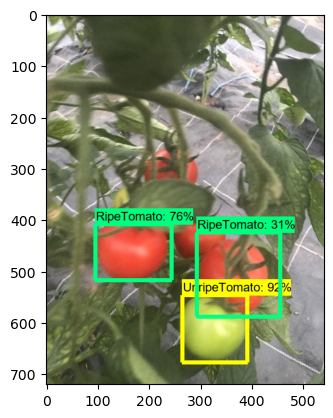

Tensorflow/workspace/images/testset\IMG_7530.JPG
100
Ripe Tomatos: 2
Unripe Tomatos: 1


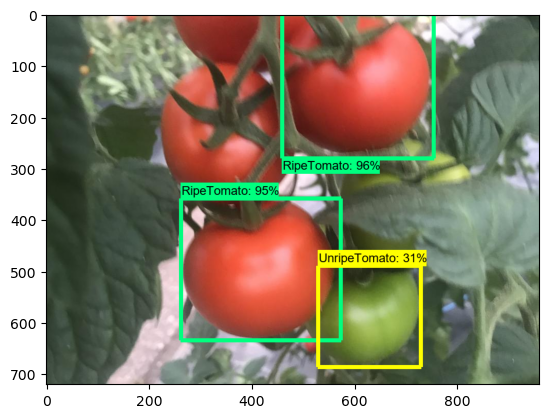

Tensorflow/workspace/images/testset\IMG_8063.JPG
100
Ripe Tomatos: 1
Unripe Tomatos: 1


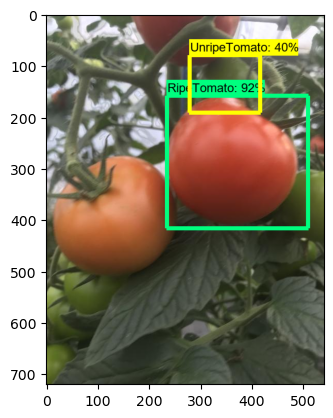

Tensorflow/workspace/images/testset\IMG_8081.JPG
100
Ripe Tomatos: 1
Unripe Tomatos: 1


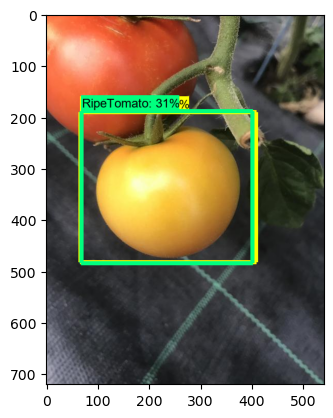

Tensorflow/workspace/images/testset\IMG_8092.JPG
100
Ripe Tomatos: 4
Unripe Tomatos: 3


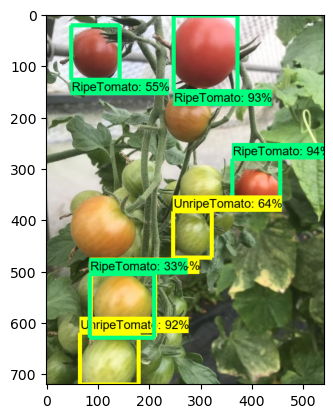

Tensorflow/workspace/images/testset\IMG_8167.JPG
100
Ripe Tomatos: 2
Unripe Tomatos: 0


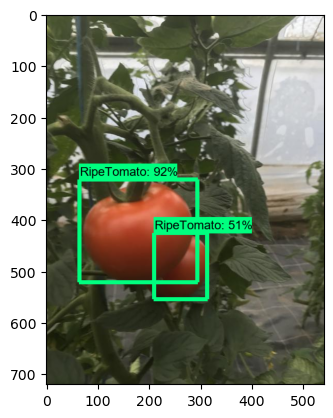

Tensorflow/workspace/images/testset\IMG_8187.JPG
100
Ripe Tomatos: 5
Unripe Tomatos: 3


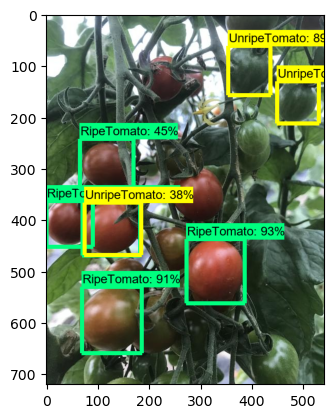

Tensorflow/workspace/images/testset\IMG_8304.JPG
100
Ripe Tomatos: 5
Unripe Tomatos: 0


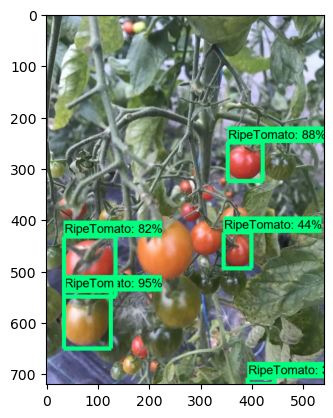

Tensorflow/workspace/images/testset\tomato_31.jpg
100
Ripe Tomatos: 1
Unripe Tomatos: 0


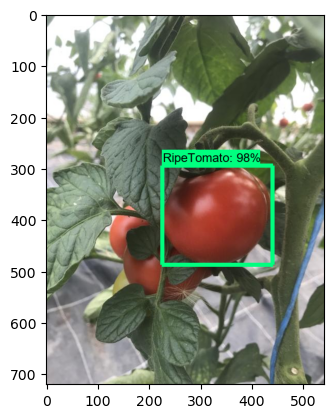

Tensorflow/workspace/images/testset\tomato_34.jpg
100
Ripe Tomatos: 1
Unripe Tomatos: 1


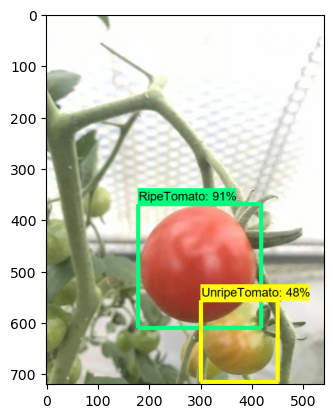

Tensorflow/workspace/images/testset\tomato_47.jpg
100
Ripe Tomatos: 2
Unripe Tomatos: 1


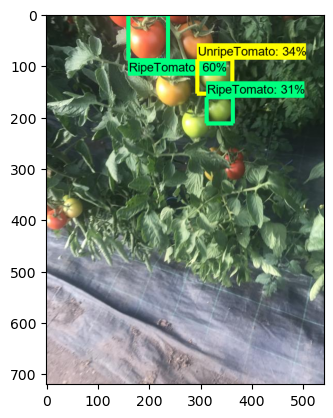

Tensorflow/workspace/images/testset\tomato_53.jpg
100
Ripe Tomatos: 1
Unripe Tomatos: 0


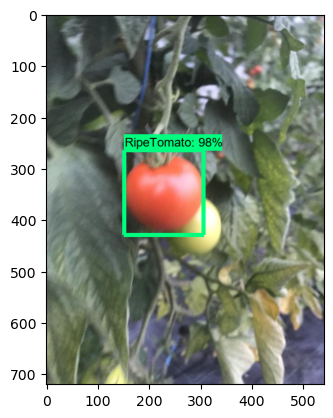

Tensorflow/workspace/images/testset\tomato_59.jpg
100
Ripe Tomatos: 1
Unripe Tomatos: 1


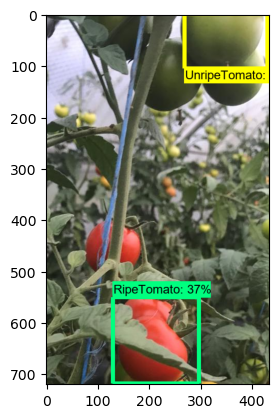

Tensorflow/workspace/images/testset\tomato_60.jpg
100
Ripe Tomatos: 2
Unripe Tomatos: 0


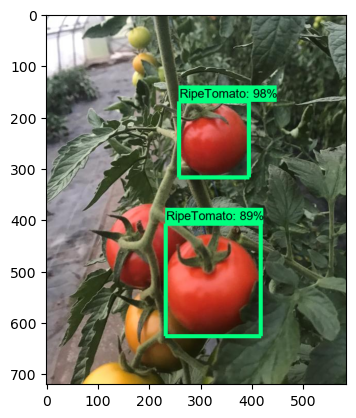

Tensorflow/workspace/images/testset\tomato_9.jpg
100
Ripe Tomatos: 6
Unripe Tomatos: 0


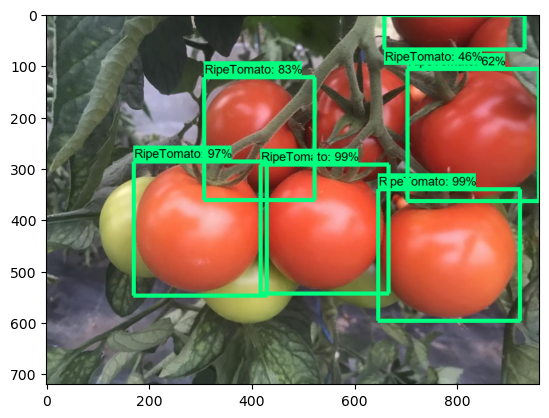

2022-12-31 11:21:15.749106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-31 11:21:15.749252: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-31 11:21:18.759856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-31 11:21:18.761001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-12-31 11:21:18.762391: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-12-31 11:21:18.763563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [27]:
directory = 'Tensorflow/workspace/images/testset'

for file in os.listdir(directory):
    if file.endswith('.JPG') or file.endswith('.jpg'):
        filename = os.path.join(directory, file)
        print(filename)

        img = cv2.imread(filename)
        image_np = np.array(img)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        print(num_detections)
        detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()


        threshhold = .30
        riped_Tomatos = 0
        unriped_Tomatos = 0

        for i, boxes in enumerate(detections['detection_boxes']):
            if(detections['detection_scores'][i] > threshhold):
                if(detections['detection_classes'][i] == 0):
                    riped_Tomatos += 1
                else:
                    unriped_Tomatos += 1
            else:
                break

        print("Ripe Tomatos: " + str(riped_Tomatos))
        print("Unripe Tomatos: " + str(unriped_Tomatos))

        viz_utils.visualize_boxes_and_labels_on_image_array(
            image=image_np_with_detections,
            boxes=detections['detection_boxes'],
            classes=detections['detection_classes']+label_id_offset,
            scores=detections['detection_scores'],
            category_index=category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=100,
            min_score_thresh=threshhold,
            agnostic_mode=False,
            line_thickness=8
        )

        plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
        plt.show()